In [56]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from itertools import combinations
from scipy import stats as st
import numpy as np

In [2]:
# Machine learning model libraries 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.ensemble import BalancedRandomForestClassifier

In [3]:
# Import Dataset
df = pd.read_csv("../Resources/sb_champion_stats.csv", index_col = 1)
df.head()

,Unnamed: 0,total_tackles_def,sacks_def,safties_def,passes_defended_def,ints_def,fumbles_lost_fum,td_passes_pass,ints_pass,sacks_pass,...,year,team,fg_success_rate,extra_success_rate,pass_success_rate,avg_yards_pass,avg_yards_rush,kicks_blocked,passes_per_rushing_plays,Champion
team_year,,,,,,,,,,,,,,,,,,,,,
arizona_cardinals_2001,0,670,5,0,29,13,7.0,0.0,0.0,0.0,...,2001,arizona_cardinals,0.833333,1.0,0.000000,10.715232,3.546939,0.0,0.004082,0.0
arizona_cardinals_2002,1,547,12,0,24,7,1.0,0.0,2.0,5.0,...,2002,arizona_cardinals,0.000000,0.0,0.388889,11.470588,4.256410,0.0,0.461538,0.0
arizona_cardinals_2003,2,548,15,0,35,8,7.0,5.0,7.0,25.0,...,2003,arizona_cardinals,0.750000,1.0,0.568862,12.957831,4.943396,0.0,3.150943,0.0
arizona_cardinals_2004,3,511,16,0,43,7,7.0,13.0,18.0,39.0,...,2004,arizona_cardinals,0.758621,1.0,0.560150,11.369231,3.585034,0.0,3.619048,0.0
arizona_cardinals_2005,4,483,19,0,27,9,11.0,21.0,21.0,45.0,...,2005,arizona_cardinals,0.955556,1.0,0.625373,12.421053,3.541436,0.0,3.701657,0.0


In [4]:
# Drop Columns 
df = df.drop(["year", "team", "Unnamed: 0", "extra_success_rate", "fg_success_rate", "kicks_blocked", 
             "safties_def"], axis = 1)
df.shape

(511, 15)

In [5]:
X = df.drop("Champion", axis = 1)
y = df["Champion"]

# Scaling Features

In [6]:
# Generate Scaler instance and scale the data
X_scaled = StandardScaler().fit_transform(X)

# Adressing Target Variable Imbalance

## Target variable imbalance needs to be addressed to avoid overfitting

In [7]:
# Value counts for target variable shows a minority:majority class ratio of about 1:30
y.value_counts()

0.0    495
1.0     16
Name: Champion, dtype: int64

In [8]:
# Prior to addressing the issue, we must split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=1)

## Naive random over and under sampling

In [9]:
# Naive under sampling will randomly reduce the amount of observations in the majority class to balance outcomes
naive_rus = RandomUnderSampler(random_state=1)
X_naive_rus, y_naive_rus = naive_rus.fit_resample(X_train, y_train)

In [10]:
# Show results
y_naive_rus.value_counts()

0.0    10
1.0    10
Name: Champion, dtype: int64

In [11]:
# Naive over sampling will randomly generate new minority class observations to balance outcomes
naive_ros = RandomOverSampler(random_state=1)
X_naive_ros, y_naive_ros = naive_ros.fit_resample(X_train, y_train)

In [12]:
# Show results
y_naive_ros.value_counts()

0.0    373
1.0    373
Name: Champion, dtype: int64

In [13]:
# We may also apply both sequentially and set the sampling strategy parameter to balance out the outcomes
naive_ros_2 = RandomOverSampler(random_state=1, sampling_strategy=.5)
X_naive_ros_2, y_naive_ros_2 = naive_ros_2.fit_resample(X_train, y_train)

naive_rus_2 = RandomUnderSampler(random_state=1)
X_naive_ros_rus, y_naive_ros_rus = naive_rus_2.fit_resample(X_naive_ros_2, y_naive_ros_2)

In [14]:
# Show Results
y_naive_ros_rus.value_counts()

0.0    186
1.0    186
Name: Champion, dtype: int64

## SMOTE oversampling

In [15]:
# Smote oversampling will create synthetic new observations similar to the minority class to balance outcomes
smote = SMOTE(random_state=1)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [16]:
# Show results
y_smote.value_counts()

0.0    373
1.0    373
Name: Champion, dtype: int64

## Combination sampling: SMOTEENN

In [17]:
# Smoteenn will balance outcomes by utilizing both over and under sampling methods
smoteenn = SMOTEENN(random_state=1)
X_smoteenn, y_smoteenn = smoteenn.fit_resample(X_train, y_train)

In [18]:
# Show results
y_smoteenn.value_counts()

1.0    368
0.0    264
Name: Champion, dtype: int64

# Supervised Learning Models: First Iteration (all features)

## Logistic Regression

In [19]:
# Generate model instance
lr_model = LogisticRegression(solver='lbfgs', random_state=1)

In [20]:
# Fit on resampled features and predict

## Naive random undersample
lr_model.fit(X_naive_rus, y_naive_rus)
y_lr_naive_rus = lr_model.predict(X_test)

## Naive random oversample
lr_model.fit(X_naive_ros, y_naive_ros)
y_lr_naive_ros = lr_model.predict(X_test)

## Naive ros rus
lr_model.fit(X_naive_ros_rus, y_naive_ros_rus)
y_lr_naive_ros_rus = lr_model.predict(X_test)

## SMOTE
lr_model.fit(X_smote, y_smote)
y_lr_smote = lr_model.predict(X_test)

## SMOTEENN
lr_model.fit(X_smoteenn, y_smoteenn)
y_lr_smoteenn = lr_model.predict(X_test)

In [21]:
# Display results

## Confusion Matrix, Accuracy Score and Classification Report
for x in [y_lr_naive_rus, y_lr_naive_ros, y_lr_naive_ros_rus, y_lr_smote, y_lr_smoteenn]:
    print(accuracy_score(y_test, x))
    print(confusion_matrix(y_test, x))
    print(classification_report(y_test, x))
    print(" ")

0.515625
[[62 60]
 [ 2  4]]
              precision    recall  f1-score   support

         0.0       0.97      0.51      0.67       122
         1.0       0.06      0.67      0.11         6

    accuracy                           0.52       128
   macro avg       0.52      0.59      0.39       128
weighted avg       0.93      0.52      0.64       128

 
0.78125
[[98 24]
 [ 4  2]]
              precision    recall  f1-score   support

         0.0       0.96      0.80      0.88       122
         1.0       0.08      0.33      0.12         6

    accuracy                           0.78       128
   macro avg       0.52      0.57      0.50       128
weighted avg       0.92      0.78      0.84       128

 
0.765625
[[96 26]
 [ 4  2]]
              precision    recall  f1-score   support

         0.0       0.96      0.79      0.86       122
         1.0       0.07      0.33      0.12         6

    accuracy                           0.77       128
   macro avg       0.52      0.56      0.

## Random Forest Classifier

In [22]:
# Generate model instance
rf_model = RandomForestClassifier(n_estimators=400, random_state=1)

In [23]:
# Fit on resampled features and predict

## Naive random undersample
rf_model.fit(X_naive_rus, y_naive_rus)
y_rf_naive_rus = rf_model.predict(X_test)
rf_naive_rus_fi = rf_model.feature_importances_

## Naive random oversample
rf_model.fit(X_naive_ros, y_naive_ros)
y_rf_naive_ros = rf_model.predict(X_test)
rf_naive_ros_fi = rf_model.feature_importances_

## Naive ros rus
rf_model.fit(X_naive_ros_rus, y_naive_ros_rus)
y_rf_naive_ros_rus = rf_model.predict(X_test)
rf_naive_ros_rus_fi = rf_model.feature_importances_

## SMOTE
rf_model.fit(X_smote, y_smote)
y_rf_smote = rf_model.predict(X_test)
rf_smote_fi = rf_model.feature_importances_

## SMOTEENN
rf_model.fit(X_smoteenn, y_smoteenn)
y_rf_smoteenn = rf_model.predict(X_test)
rf_smoteenn_fi = rf_model.feature_importances_

In [24]:
# Display results

## Confusion Matrix, Accuracy Score and Classification Report
for x in [y_rf_naive_rus, y_rf_naive_ros, y_rf_naive_ros_rus, y_rf_smote, y_rf_smoteenn]:
    print(accuracy_score(y_test, x))
    print(confusion_matrix(y_test, x))
    print(classification_report(y_test, x))
    print(" ")

0.4296875
[[51 71]
 [ 2  4]]
              precision    recall  f1-score   support

         0.0       0.96      0.42      0.58       122
         1.0       0.05      0.67      0.10         6

    accuracy                           0.43       128
   macro avg       0.51      0.54      0.34       128
weighted avg       0.92      0.43      0.56       128

 
0.953125
[[122   0]
 [  6   0]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98       122
         1.0       0.00      0.00      0.00         6

    accuracy                           0.95       128
   macro avg       0.48      0.50      0.49       128
weighted avg       0.91      0.95      0.93       128

 
0.953125
[[122   0]
 [  6   0]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98       122
         1.0       0.00      0.00      0.00         6

    accuracy                           0.95       128
   macro avg       0.48      0.

/Users/Alvarado/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Alvarado/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Alvarado/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

## Balanced Random Forest Classifier

In [25]:
# Generate Imbalanced Random Forest Classier instance
irf_model = BalancedRandomForestClassifier(n_estimators=250, random_state=1)

In [26]:
# Fit on features and predict
irf_model.fit(X_train, y_train)
y_irf = irf_model.predict(X_test)

In [27]:
# Feature impotances
irf_fi = irf_model.feature_importances_

In [28]:
# Display results
print(accuracy_score(y_test, y_irf))
print(confusion_matrix(y_test, y_irf))
print(classification_report(y_test, y_irf))

0.5703125
[[69 53]
 [ 2  4]]
              precision    recall  f1-score   support

         0.0       0.97      0.57      0.72       122
         1.0       0.07      0.67      0.13         6

    accuracy                           0.57       128
   macro avg       0.52      0.62      0.42       128
weighted avg       0.93      0.57      0.69       128



# Evaluating feature importance

In [29]:
# Create feature importances DataFrame
fi_df = pd.DataFrame({"RF-RUS":rf_naive_rus_fi, "RF-ROS":rf_naive_ros_fi, "RF-ROS-RUS":rf_naive_ros_rus_fi,
              "RF-SMOTE":rf_smote_fi, "RF-SMOTEENN":rf_smoteenn_fi, "IRF":irf_fi}, 
             index = X.columns)
fi_df

,RF-RUS,RF-ROS,RF-ROS-RUS,RF-SMOTE,RF-SMOTEENN,IRF
total_tackles_def,0.090383,0.073887,0.081842,0.081795,0.066837,0.083803
sacks_def,0.044563,0.033042,0.030305,0.028269,0.025662,0.037519
passes_defended_def,0.081433,0.034371,0.042009,0.030966,0.028696,0.055430
ints_def,0.028790,0.036894,0.033348,0.052812,0.042470,0.049155
fumbles_lost_fum,0.044010,0.083412,0.086889,0.135261,0.161189,0.081580
td_passes_pass,0.085493,0.111746,0.131284,0.137094,0.155300,0.099072
ints_pass,0.090628,0.114793,0.096209,0.051138,0.039627,0.079029
sacks_pass,0.139486,0.059368,0.058247,0.063619,0.054282,0.068279
receiving_tds_rec,0.066555,0.056200,0.060010,0.061709,0.059629,0.053320
rushing_tds_rush,0.074377,0.059663,0.060682,0.050721,0.048507,0.067118


RF-RUS


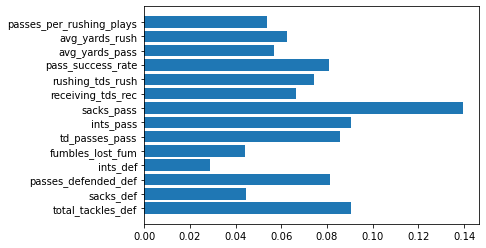

RF-ROS


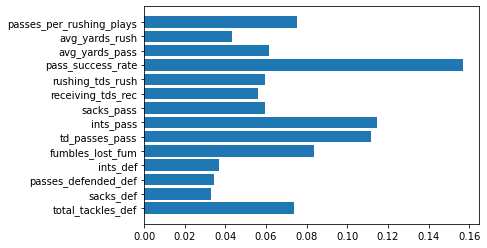

RF-ROS-RUS


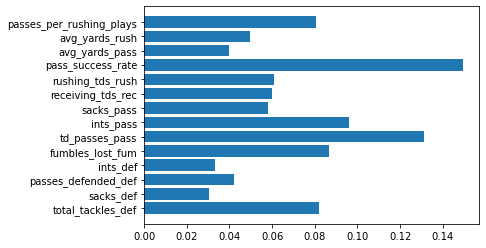

RF-SMOTE


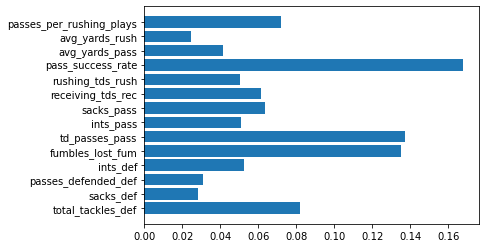

RF-SMOTEENN


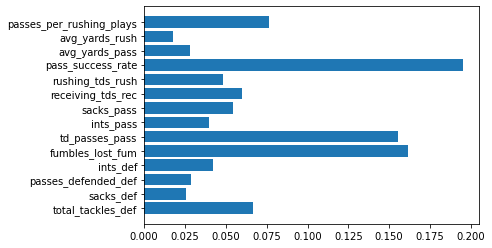

IRF


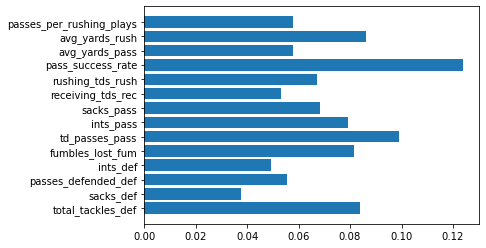

In [31]:
# Plot descriptive statistics of feature importances
for col in fi_df.columns:
    print(col)
    plt.figure()
    plt.barh(fi_df.index, width = fi_df[col])
    plt.show()
    plt.close()

In [32]:
# Create descriptive statistics for feature importances across models DataFrame
fi_stats_df = pd.DataFrame({"Sum":fi_df.transpose().sum(),"Mean":fi_df.transpose().mean(), "Max": fi_df.transpose().max(),
             "Min": fi_df.transpose().min()}, index = fi_df.index)
fi_stats_df


,Sum,Mean,Max,Min
total_tackles_def,0.478547,0.079758,0.090383,0.066837
sacks_def,0.199360,0.033227,0.044563,0.025662
passes_defended_def,0.272904,0.045484,0.081433,0.028696
ints_def,0.243469,0.040578,0.052812,0.028790
fumbles_lost_fum,0.592341,0.098723,0.161189,0.044010
td_passes_pass,0.719988,0.119998,0.155300,0.085493
ints_pass,0.471425,0.078571,0.114793,0.039627
sacks_pass,0.443281,0.073880,0.139486,0.054282
receiving_tds_rec,0.357423,0.059570,0.066555,0.053320
rushing_tds_rush,0.361067,0.060178,0.074377,0.048507


Sum


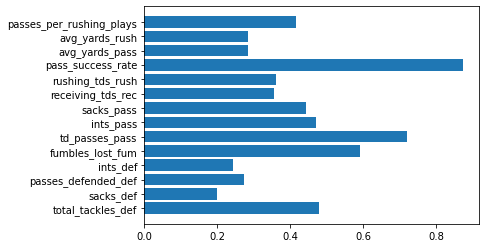

Mean


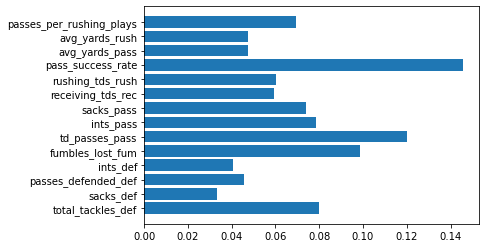

Max


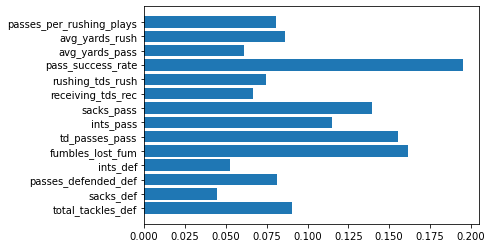

Min


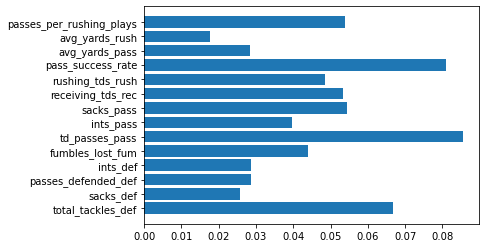

In [33]:
# Plot descriptive statistics of feature importances across models
for col in fi_stats_df.columns:
    print(col)
    plt.figure()
    plt.barh(fi_stats_df.index, width = fi_stats_df[col])
    plt.show()
    plt.close()

## Evaluating the statistical difference of features between groups

In [135]:
# Difference of means within groups in naive_rus resample
naive_rus_pvalue = {}
for i in range(0,(len(X.columns))):
    a = X_naive_rus[y_naive_rus == 0,i]
    b = X_naive_rus[y_naive_rus == 1,i]
    naive_rus_pvalue[f"{X.columns[i]}"] = st.ttest_ind(a, b)[1]

In [136]:
# Difference of means within groups in naive_ros resample
naive_ros_pvalue = {}
for i in range(0,(len(X.columns))):
    a = X_naive_ros[y_naive_ros == 0,i]
    b = X_naive_ros[y_naive_ros == 1,i]
    naive_ros_pvalue[f"{X.columns[i]}"] = st.ttest_ind(a, b)[1]

In [137]:
# Difference of means within groups in naive_ros_rus resample
naive_ros_rus_pvalue = {}
for i in range(0,(len(X.columns))):
    a = X_naive_ros_rus[y_naive_ros_rus == 0,i]
    b = X_naive_ros_rus[y_naive_ros_rus == 1,i]
    naive_ros_rus_pvalue[f"{X.columns[i]}"] = st.ttest_ind(a, b)[1]

In [138]:
# Difference of means within groups in smote resample
smote_pvalue = {}
for i in range(0,(len(X.columns))):
    a = X_smote[y_smote == 0,i]
    b = X_smote[y_smote == 1,i]
    smote_pvalue[f"{X.columns[i]}"] = st.ttest_ind(a, b)[1]

In [139]:
# Difference of means within groups in smoteenn resample
smoteenn_pvalue = {}
for i in range(0,(len(X.columns))):
    a = X_smoteenn[y_smoteenn == 0,i]
    b = X_smoteenn[y_smoteenn == 1,i]
    smoteenn_pvalue[f"{X.columns[i]}"] = st.ttest_ind(a, b)[1]

In [183]:
# Create DataFrame of Pvalues
pvalues_df = pd.DataFrame([naive_ros_pvalue, naive_rus_pvalue, naive_ros_rus_pvalue, smote_pvalue, smoteenn_pvalue],
                         index = ["naive_ros", "naive_rus", "naive_ros_rus", "smote", "smoteenn"]).transpose()
pvalues_df

,naive_ros,naive_rus,naive_ros_rus,smote,smoteenn
total_tackles_def,4.297937e-01,0.404867,6.401453e-01,6.405916e-01,1.311684e-01
sacks_def,1.342621e-02,0.531182,1.851426e-03,2.822726e-02,7.741333e-04
passes_defended_def,5.719424e-05,0.168430,1.156643e-03,7.164529e-04,2.167999e-04
ints_def,6.442915e-01,0.462083,7.236085e-01,6.053698e-01,6.033608e-01
fumbles_lost_fum,1.574084e-08,0.397873,2.859805e-06,1.142393e-07,7.657682e-08
td_passes_pass,2.348110e-23,0.158413,1.239059e-13,1.565929e-28,1.828960e-39
ints_pass,4.859906e-08,0.506614,1.646673e-03,9.953087e-14,7.316565e-17
sacks_pass,1.369724e-07,0.069719,5.393136e-05,2.085163e-11,1.680636e-13
receiving_tds_rec,9.818978e-03,0.581840,4.735444e-02,4.508128e-02,9.198237e-05
rushing_tds_rush,1.067047e-10,0.168697,9.446837e-06,8.074879e-15,1.289607e-22


In [193]:
# Check significance of features with criterio of pvalue<.05
pvalues_df[pvalues_df<.05].transpose().count()

total_tackles_def           0
sacks_def                   4
passes_defended_def         4
ints_def                    0
fumbles_lost_fum            4
td_passes_pass              4
ints_pass                   4
sacks_pass                  4
receiving_tds_rec           4
rushing_tds_rush            4
pass_success_rate           4
avg_yards_pass              0
avg_yards_rush              2
passes_per_rushing_plays    4
dtype: int64

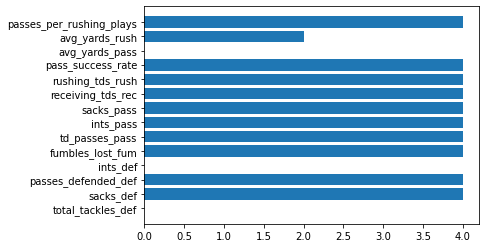

In [194]:
# Plot count of significance of pvalues across resamples
plt.figure()
plt.barh(pvalues_df.index, width = pvalues_df[pvalues_df<.05].transpose().count())
plt.show()
plt.close()

# Conclusions of first iteration

## Models:

### All three models (Logistic Regression, Random Forest, and Balanced Random Forest) where unable to accurately predict the minority class (Champion = 1), even across mutiple random resampling techniques (naive under and over sampling, smote, and smoteenn). Some instances did achieve the accuracy of around 50% but did so at the expense of a considerable loss in accuracy for the majority class (Champion = 0). It might be the case that the features are non-informative. In this regard, we proceeded to feature importance evaluation. 

## Feature importance:

### There was no observable consensus across model and random resampling combinations as to feature importances. It might be the case that non-informative features are introducing noise into the models and therefore into the estimation of feature importance. In this regard, we proceed to evaluate the features with a different approach, we calculated t-tests to see which features have statistically different means between the majority (Champion = 0) and minority (Champion = 1) classes.

## T-tests:

### T-tests were peformed for all features across random resamples. T-tests for the naive random undersample showed that no feature showed a statistical difference of means between classes. This is not surprising as the naive undersampling severely reduced the amount of observations. On the other hand, there was a consensus among the other resampling techniques as to which features serve, in terms of means, to differentiate between classes.

## Veredict:

### As informed by all of the above, a second iteration of all estimations will be performed without the following features: "avg_yards_rush", "avg_yards_pass", "ints_def", "total_tackles_def".